In [2]:
#TEXT PREPROCESSING 
#importing thr necessary libraries
import nltk
import string
import re

In [4]:
#Text Lowercase

def lowercase_text(text):
    return text.lower()
input_str = "WEATHER IS TOO CLOUDY."
lowercase_text(input_str)

'weather is too cloudy.'

In [5]:
#REMOVE NUMBERS
def remove_num(text):
    result = re.sub(r'\d+', '', text)
    return result

input_s = "i have 10 candies"
remove_num(input_s)

'i have  candies'

In [8]:
#REMOVE PUNCTUATION
def rem_punct(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

input_str = "Hey, Are you excited??, After a week, we will be in Shimla!!!"
rem_punct(input_str)

'Hey Are you excited After a week we will be in Shimla'

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
#REMOVE DEFAULT STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def rem_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    
    # Remove punctuation first
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    # Remove stopwords
    filtered_text = [word for word in filtered_text if word.lower() not in stop_words]
    
    return filtered_text

ex_text = "Data is the new oil. A.I is the last invention"
print(rem_stopwords(ex_text))


['Data', 'new', 'oil', 'A.I', 'last', 'invention']


In [13]:
#STEMMING
#importing nltk's porter stemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stem1 = PorterStemmer()

#stem words in the list of tokenised words
def s_words(text):
    word_tokens = word_tokenize(text)
    stems = [stem1.stem(word) for word in word_tokens]
    return stems

In [14]:
#stem words in the list of tokenised words
def s_words(text):
    word_toekns = word_tokenize(text)
    stems = [stem1.stem(word) for word in word_toekns]
    return stems

text = 'Data is the new revolution in the world, in a day one individual would generate terabytes of data'
s_words(text)

['data',
 'is',
 'the',
 'new',
 'revolut',
 'in',
 'the',
 'world',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individu',
 'would',
 'gener',
 'terabyt',
 'of',
 'data']

In [18]:
#LEMMATIZATION
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')
#lemmatizing strings

def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    #provide context i.e. POS
    lemmas = [lemma.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
def lemmatize_Word(text):
    word_tokens = word_tokenize(text)
    #provide context i.e. POS
    lemmas = [lemma.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

text = 'data is the new revolution in the world, in a day one individual would generate terabytes of data'
lemmatize_word(text)

['data',
 'be',
 'the',
 'new',
 'revolution',
 'in',
 'the',
 'world',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individual',
 'would',
 'generate',
 'terabytes',
 'of',
 'data']

In [23]:
#PARTS OF SPEECH (POS) TAGGING

#importing tokenize library
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

#convert text into word_tokens with their tags
def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tagg('Are you afraid of something?')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

In [25]:
#downloading the tagset
nltk.download('tagsets')

# extract information about the tag
nltk.help.upenn_tagset('PRP')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...


PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


[nltk_data]   Unzipping help\tagsets.zip.


In [34]:
#CHUNCKING
#importing libraries

from nltk.tokenize import word_tokenize
from nltk import pos_tag

#here we define chunking function with text and regular
#expressions representing grammar as parameter I

def chunking (text, grammar):
    word_tokens = word_tokenize (text)
    #label words with pos
    word_pos = pos_tag(word_tokens)
    #create chunk parser using grammar
    chunkParser = nltk.RegexpParser(grammar)
    # test it on the list of word tokens with tagged pos
    tree = chunkParser.parse(word_pos)
    for subtree in tree.subtrees():
        print(subtree)
        #tree.draw()
sentence = 'the little red parrot is flying in the sky'
grammar = "NP: {<DT>?<]]>*<NN>}"
chunking(sentence, grammar)



(S
  the/DT
  little/JJ
  red/JJ
  (NP parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP parrot/NN)
(NP the/DT sky/NN)


In [36]:
#NAME ENTITY RECOGNITION

# Importing tokenization and chunk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
import nltk

# Downloading required NLTK resources
nltk.download('maxent_ne_chunker')
nltk.download('words')


def ner(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    
    # POS tagging of words
    word_pos = pos_tag(word_tokens)
    
    # Tree of word entities
    print(ne_chunk(word_pos))

# Example text
text = 'Brain Lara scored the highest 400 runs in a test match which played in between WI and England.'
ner(text)


(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  (ORGANIZATION WI/NNP)
  and/CC
  (GPE England/NNP)
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [40]:
#REGEX 

import re
sent = "dataset, Data is a new fuel"
r2 = re.findall(r"^\W+",sent)
print(r2)

[]


In [41]:
#examples of \s expression in re.split function

import re
print((re.split(r'\s','We splitted this sentence')))

['We', 'splitted', 'this', 'sentence']


In [42]:
import re

print((re.split(r's','We splitted this sentence')))

['We ', 'plitted thi', ' ', 'entence']


In [45]:
#USE REGEX METHODS
#re.match()
#re.search()
#re.findall()

import re

lists = ['icecream images', 'i immitated', 'inner peace']

for i in lists:
    q = re.match(r"(i\w+)\W(i\w+)", i)  # Match two words starting with 'i'
    if q:  
        print(q.groups())


('icecream', 'images')


In [46]:
#re.search

import re

pattern = ["playing", "dataset"]
text = "Raju is playing outside."

for p in pattern:
    print("You're looking for '%s' in '%s'" % (p, text), end=' ')
    
    if re.search(p, text):
        print('Found match!')
    else:
        print('no match found!')


You're looking for 'playing' in 'Raju is playing outside.' Found match!
You're looking for 'dataset' in 'Raju is playing outside.' no match found!


In [47]:
#re.findall
import re

kgf = "Abc@gmail.com, XYX@gmail.com, lmn@gmail.com, efg@gmail.com"

emails = re.findall(r'[\w\.-]+@[\w\.-]+', kgf)

for e in emails:
    print(e)



Abc@gmail.com
XYX@gmail.com
lmn@gmail.com
efg@gmail.com


In [49]:
#TEXT NORMALIZATION
#TOKENIZERS
!pip install --user -U nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 328.9 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 328.9 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 409.3 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 409.3 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 409.3 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 402

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from nltk.tokenize.regexp import WhitespaceTokenizer
m = "' There is no need to panic. We need to work together, take small yet important measure to ensure self:protect.' "

In [51]:
from nltk.tokenize import word_tokenize

text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization"""
word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization']

In [52]:
tokens = WhitespaceTokenizer().tokenize(m)
print(len(tokens))

20


In [53]:
tokens

["'",
 'There',
 'is',
 'no',
 'need',
 'to',
 'panic.',
 'We',
 'need',
 'to',
 'work',
 'together,',
 'take',
 'small',
 'yet',
 'important',
 'measure',
 'to',
 'ensure',
 "self:protect.'"]

In [54]:
my_vocab = set(tokens)
print(len(tokens))

20


In [55]:
my_vocab

{"'",
 'There',
 'We',
 'ensure',
 'important',
 'is',
 'measure',
 'need',
 'no',
 'panic.',
 "self:protect.'",
 'small',
 'take',
 'to',
 'together,',
 'work',
 'yet'}

In [56]:
my_st = "'there is no need to panic. We need to work together, take small yet important measure to ensure.'"

In [58]:
from nltk.tokenize.regexp import WordPunctTokenizer

In [59]:
m_t = WordPunctTokenizer().tokenize(my_st)
print(len(m_t))

22


In [60]:
m_t

["'",
 'there',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'work',
 'together',
 ',',
 'take',
 'small',
 'yet',
 'important',
 'measure',
 'to',
 'ensure',
 ".'"]

In [61]:
my_vocab = set(m_t)
print(len(my_vocab))

19


In [62]:
my_vocab

{"'",
 ',',
 '.',
 ".'",
 'We',
 'ensure',
 'important',
 'is',
 'measure',
 'need',
 'no',
 'panic',
 'small',
 'take',
 'there',
 'to',
 'together',
 'work',
 'yet'}

In [67]:
from nltk.tokenize import sent_tokenize

#sentence tokenization
text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization. in 2008, liquid fuel launch vehicle to orbit the earth"""
sent_tokenize(text)

["Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization.",
 'in 2008, liquid fuel launch vehicle to orbit the earth']

In [71]:
#FREQUENCY DISTRIBUTION

import nltk
nltk.download('gutenberg')
print("\n\n\n")
text1 = "'there is no need to panic. we need to work together, take small yet important measure to ensure'"
freqDist = nltk.FreqDist(word_tokenize(text1))
print(freqDist)





<FreqDist with 18 samples and 21 outcomes>


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\cmgou\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [72]:
print(freqDist["person"])

0


In [74]:
print(freqDist["is"])

1


In [75]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


In [76]:
print(len(words))

18


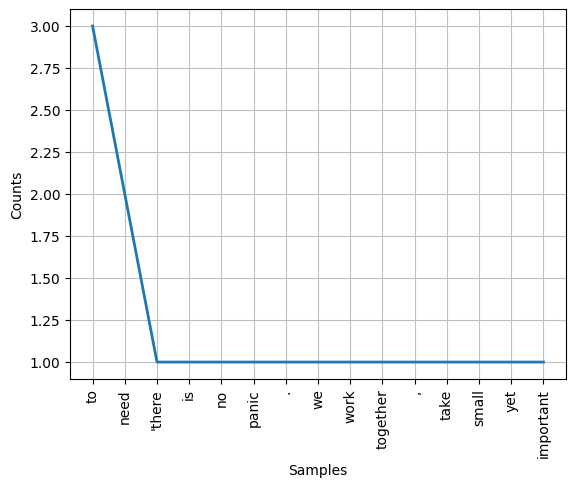

<Axes: xlabel='Samples', ylabel='Counts'>

In [77]:
freqDist.plot(15)